# Convert data extracted from Frost

## Purpose
Convert data that can be extracted from MET observation storage through the Frost API https://frost.met.no/index.html. The extraction process is not documented.

Import the necessary packages.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

Read the actual data file that has been extracted from the Frost API described above.

In [2]:
mydf = pd.read_csv('radflux-bjørnøya-frost.txt', header=0, infer_datetime_format=True, parse_dates=['referenceTime'], na_values=['-'])

Dump an overview of the data that has been read.

In [3]:
mydf.keys()

Index(['sourceId', 'referenceTime',
       'mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)',
       'timeOffset', 'timeResolution', 'timeSeriesId', 'performanceCategory',
       'exposureCategory', 'qualityCode',
       'mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)',
       'timeOffset.1', 'timeResolution.1', 'timeSeriesId.1',
       'performanceCategory.1', 'exposureCategory.1', 'qualityCode.1'],
      dtype='object')

In [4]:
mydf

,sourceId,referenceTime,mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2),timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2),timeOffset.1,timeResolution.1,timeSeriesId.1,performanceCategory.1,exposureCategory.1,qualityCode.1
0,sn99710:0,2021-04-01 00:00:00+00:00,0.0,PT0H,PT1M,0,A,2,1,299.4,PT0H,PT1M,0,C,2,0
1,sn99710:0,2021-04-01 00:01:00+00:00,0.0,PT0H,PT1M,0,A,2,1,299.4,PT0H,PT1M,0,C,2,0
2,sn99710:0,2021-04-01 00:02:00+00:00,0.0,PT0H,PT1M,0,A,2,1,299.4,PT0H,PT1M,0,C,2,0
3,sn99710:0,2021-04-01 00:03:00+00:00,0.0,PT0H,PT1M,0,A,2,1,299.1,PT0H,PT1M,0,C,2,0
4,sn99710:0,2021-04-01 00:04:00+00:00,0.0,PT0H,PT1M,0,A,2,1,299.0,PT0H,PT1M,0,C,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40880,sn99710:0,2021-04-29 23:55:00+00:00,1.2,PT0H,PT1M,0,A,2,0,265.9,PT0H,PT1M,0,C,2,0
40881,sn99710:0,2021-04-29 23:56:00+00:00,1.4,PT0H,PT1M,0,A,2,0,264.1,PT0H,PT1M,0,C,2,0
40882,sn99710:0,2021-04-29 23:57:00+00:00,1.4,PT0H,PT1M,0,A,2,0,263.9,PT0H,PT1M,0,C,2,0
40883,sn99710:0,2021-04-29 23:58:00+00:00,1.4,PT0H,PT1M,0,A,2,0,264.4,PT0H,PT1M,0,C,2,0


Plot the dataset.

In [5]:
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

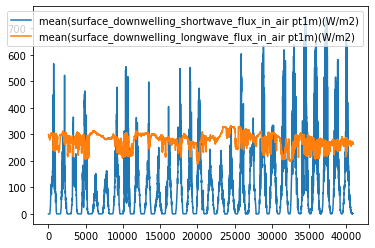

In [6]:
mydf.plot.line(y=['mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)','mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)'])

Create an Xarray dataset from a Pandas dataframe

In [7]:
xrds = xr.Dataset.from_dataframe(mydf[['referenceTime', 'mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)','mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)']])

In [8]:
xrds

<xarray.Dataset>
Dimensions:                                                     (index: 40885)
Coordinates:
  * index                                                       (index) int64 ...
Data variables:
    referenceTime                                               (index) object ...
    mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)  (index) float64 ...
    mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)   (index) float64 ...

In [9]:
type(xrds['referenceTime'])

xarray.core.dataarray.DataArray

In [10]:
mytime = pd.to_datetime(xrds['referenceTime'])

In [11]:
mytime

DatetimeIndex(['2021-04-01 00:00:00+00:00', '2021-04-01 00:01:00+00:00',
               '2021-04-01 00:02:00+00:00', '2021-04-01 00:03:00+00:00',
               '2021-04-01 00:04:00+00:00', '2021-04-01 00:05:00+00:00',
               '2021-04-01 00:06:00+00:00', '2021-04-01 00:07:00+00:00',
               '2021-04-01 00:08:00+00:00', '2021-04-01 00:09:00+00:00',
               ...
               '2021-04-29 23:50:00+00:00', '2021-04-29 23:51:00+00:00',
               '2021-04-29 23:52:00+00:00', '2021-04-29 23:53:00+00:00',
               '2021-04-29 23:54:00+00:00', '2021-04-29 23:55:00+00:00',
               '2021-04-29 23:56:00+00:00', '2021-04-29 23:57:00+00:00',
               '2021-04-29 23:58:00+00:00', '2021-04-29 23:59:00+00:00'],
              dtype='datetime64[ns, UTC]', length=40885, freq=None)

In [12]:
xrds['index'].coords

Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 40879 40880 40881 40882 40883 40884

In [13]:
mytmp = xr.DataArray(data = mytime, coords=dict(index=list(range(0,len(mytime)))))

In [14]:
mytmp

<xarray.DataArray (index: 40885)>
array([1617235200000000000, 1617235260000000000, 1617235320000000000, ...,
       1619740620000000000, 1619740680000000000, 1619740740000000000],
      dtype=object)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 40879 40880 40881 40882 40883 40884

In [39]:
mytmp.attrs

{}

In [15]:
xrds['mytime'] = mytmp

In [16]:
xrds

<xarray.Dataset>
Dimensions:                                                     (index: 40885)
Coordinates:
  * index                                                       (index) int64 ...
Data variables:
    referenceTime                                               (index) object ...
    mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)  (index) float64 ...
    mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)   (index) float64 ...
    mytime                                                      (index) object ...

In [17]:
xrds['referenceTime'].coords

Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 40879 40880 40881 40882 40883 40884

Rename index to ensure CF compliance

In [18]:
xrds = xrds.rename_dims({'index':'time'})

In [19]:
xrds

<xarray.Dataset>
Dimensions:                                                     (time: 40885)
Coordinates:
    index                                                       (time) int64 ...
Dimensions without coordinates: time
Data variables:
    referenceTime                                               (time) object ...
    mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)  (time) float64 ...
    mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)   (time) float64 ...
    mytime                                                      (time) object ...

Make referenceTime the time coordinate.

In [20]:
xrds = xrds.rename({'referenceTime':'time'})

In [21]:
xrds

<xarray.Dataset>
Dimensions:                                                     (time: 40885)
Coordinates:
    index                                                       (time) int64 ...
Dimensions without coordinates: time
Data variables:
    time                                                        (time) object ...
    mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)  (time) float64 ...
    mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)   (time) float64 ...
    mytime                                                      (time) object ...

Specify time as a coordinate

In [22]:
xrds = xrds.set_coords('time')

In [23]:
xrds

<xarray.Dataset>
Dimensions:                                                     (time: 40885)
Coordinates:
    index                                                       (time) int64 ...
  * time                                                        (time) object ...
Data variables:
    mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)  (time) float64 ...
    mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)   (time) float64 ...
    mytime                                                      (time) object ...

Get rid of the numeric index as dimension.

In [24]:
xrds = xrds.reset_index('index', drop=True)

In [25]:
xrds

<xarray.Dataset>
Dimensions:                                                     (time: 40885)
Coordinates:
  * time                                                        (time) object ...
Data variables:
    mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)  (time) float64 ...
    mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)   (time) float64 ...
    mytime                                                      (time) object ...

Variable names are too long, rename variables.

In [26]:
xrds = xrds.rename({'mean(surface_downwelling_shortwave_flux_in_air pt1m)(W/m2)':'QSI',
                    'mean(surface_downwelling_longwave_flux_in_air pt1m)(W/m2)':'QLI'})

In [27]:
xrds

<xarray.Dataset>
Dimensions:  (time: 40885)
Coordinates:
  * time     (time) object 2021-04-01T00:00:00+00:00 ... 2021-04-29T23:59:00+...
Data variables:
    QSI      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.1 1.2 1.4 1.4 1.4 1.7
    QLI      (time) float64 299.4 299.4 299.4 299.1 ... 264.1 263.9 264.4 265.2
    mytime   (time) object 1617235200000000000 ... 1619740740000000000

Specify CF attributes

In [28]:
#xrds['time'].attrs = {
#    'standard_name': 'time',
#}
xrds['QSI'].attrs = {
    '_FillValue': -999.,
    'standard_name': 'dffsfsdfsdf',
    'long_name': 'dfsfsdfsdfs',
    'units':'Wm-2'
}
xrds['QLI'].attrs = {
    '_FillValue': -999.,
    'standard_name': 'dffsfsdfsdf',
    'long_name': 'dfsfsdfsdfs',
    'units':'Wm-2'
}

In [29]:
xrds

<xarray.Dataset>
Dimensions:  (time: 40885)
Coordinates:
  * time     (time) object 2021-04-01T00:00:00+00:00 ... 2021-04-29T23:59:00+...
Data variables:
    QSI      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.1 1.2 1.4 1.4 1.4 1.7
    QLI      (time) float64 299.4 299.4 299.4 299.1 ... 264.1 263.9 264.4 265.2
    mytime   (time) object 1617235200000000000 ... 1619740740000000000

Add global attributes according to ACDD

In [30]:
xrds.attrs={
    'Conventions':'CF-1.8',
    'title':'This is a test file',
    'abstract':'This is a test abstract, to be extended.',
    'creator_name':'Øystein Godøy',
    'creator_email':'o.godoy@met.no',
}

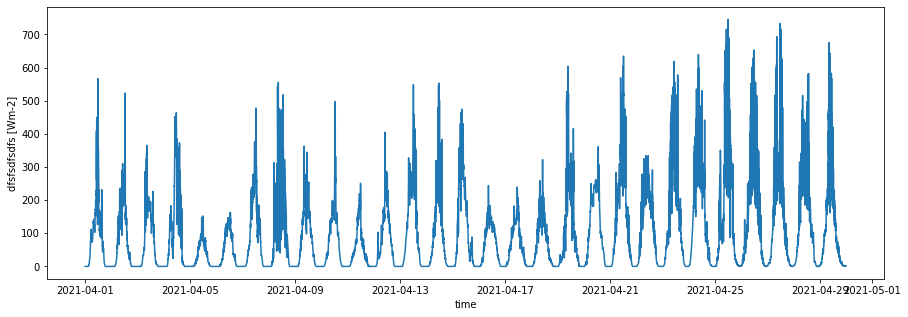

In [31]:
fig = plt.figure(figsize=(15,5))
xrds['QSI'].plot()

Ensure that data are written in the correct form to NetCDF. Data served through THREDDS Data Servers cannot have int64 datetime specifications, but int32. Also, encoding of missing values are done in this step along compression.

In [32]:
myencoding = {
    'time': {
        'dtype': 'int32',
    },
    'QSI':{'zlib':False,},
    'QLI':{'zlib':False,}
}

In [34]:
xrds.to_netcdf('mytest.nc',encoding=myencoding, engine='netcdf4')
#xrds.to_netcdf('mytest.nc')

TypeError: loop of ufunc does not support argument 0 of type Timestamp which has no callable rint method